<a href="https://colab.research.google.com/github/Deekshitmanisai/Deekshit-s-DataBase/blob/main/LDA_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import seaborn as sns


Step 1: Data Preparation
Data standardized - Mean: -0.0
Data standardized - Std: 1.0

Step 2: Applying LDA
Original data shape: (150, 4)
Transformed data shape: (150, 2)
LDA explained variance ratio: [0.9912 0.0088]

Step 3: Applying PCA for comparison
PCA explained variance ratio: [0.7296 0.2285]

Step 4: Creating visualizations


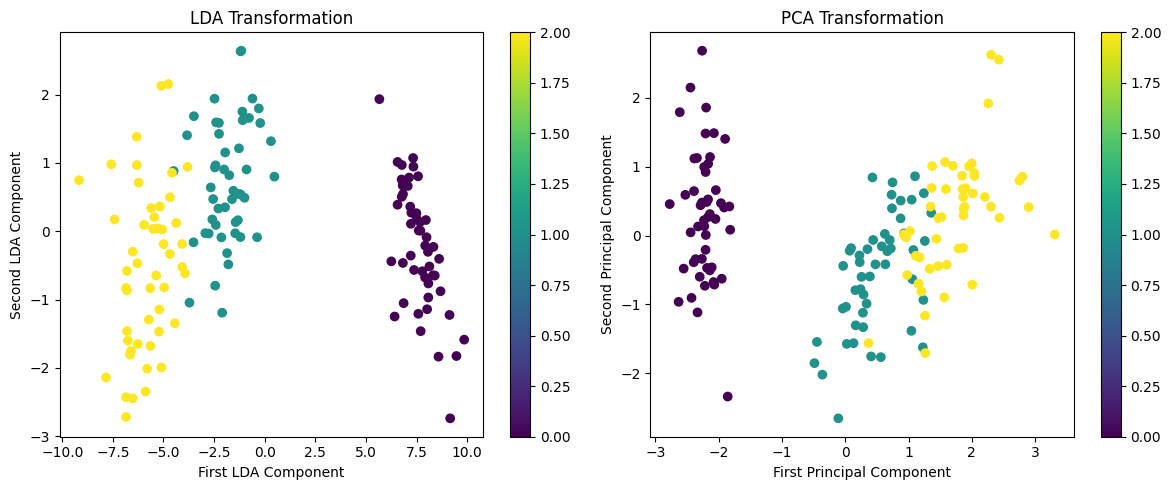


Step 5: Analysis of Results
LDA vs PCA Comparison:
- LDA maximizes class separability
- PCA maximizes variance explained

Interclass distances:
LDA: 9.4797
PCA: 2.8476


In [31]:



def lab1_lda_analysis():
    # Step 1: Load and Prepare Data
    print("Step 1: Data Preparation")
    # Load dataset
    iris = load_iris()
    X, y = iris.data, iris.target
    feature_names = iris.feature_names
     # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print("Data standardized - Mean:", X_scaled.mean().round(6))
    print("Data standardized - Std:", X_scaled.std().round(6))

    # Step 2: Apply LDA
    print("\nStep 2: Applying LDA")
    lda = LinearDiscriminantAnalysis(n_components=2)
    X_lda = lda.fit_transform(X_scaled, y)
    print("Original data shape:", X.shape)
    print("Transformed data shape:", X_lda.shape)
    print("LDA explained variance ratio:",
          lda.explained_variance_ratio_.round(4))
       # Step 3: Apply PCA for comparison
    print("\nStep 3: Applying PCA for comparison")
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    print("PCA explained variance ratio:",
          pca.explained_variance_ratio_.round(4))

    # Step 4: Visualization
    print("\nStep 4: Creating visualizations")
    plt.figure(figsize=(12, 5))

    # LDA Plot
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1],
                         c=y, cmap='viridis')
    plt.title('LDA Transformation')
    plt.xlabel('First LDA Component')
    plt.ylabel('Second LDA Component')
    plt.colorbar(scatter)


    # PCA Plot
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                         c=y, cmap='viridis')
    plt.title('PCA Transformation')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter)

    plt.tight_layout()
    plt.show()

    # Step 5: Analysis of Results
    print("\nStep 5: Analysis of Results")
    print("LDA vs PCA Comparison:")
    print("- LDA maximizes class separability")
    print("- PCA maximizes variance explained")

    # Calculate class separation metrics
    class_means_lda = [np.mean(X_lda[y == i], axis=0)
                      for i in range(3)]
    class_means_pca = [np.mean(X_pca[y == i], axis=0)
                      for i in range(3)]


    print("\nInterclass distances:")
    print("LDA:", np.linalg.norm(class_means_lda[0] - class_means_lda[1]).round(4))
    print("PCA:", np.linalg.norm(class_means_pca[0] - class_means_pca[1]).round(4))

if __name__ == "__main__":
    lab1_lda_analysis()
